# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('houses_to_rent_v2.csv')

In [4]:
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [6]:
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True)

In [7]:
df['valor_aluguel'].mean()

3896.247194163861

In [43]:
df['valor_aluguel'].median()

2661.0

In [8]:
df['valor_aluguel'].std()

3408.5455176710675

In [45]:
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

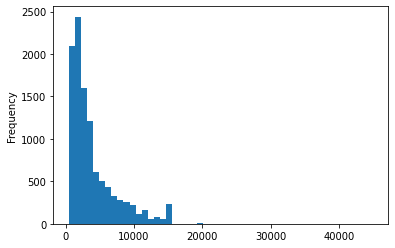

In [15]:
df['valor_aluguel'].plot(kind = 'hist', bins= 50)

In [13]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [14]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()


4.624228179818687

## Exploracao multivariáveis

### Perguntas
 
- Qual a cidade com a média de aluguel mais cara? 
- Quantos banheiros existem nas residencias com alugueis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

In [64]:
#Qual a cidade com a média de aluguel mais alta? 

df.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


In [52]:
#Quantos banheiros existem em média nas residencias com alugueis mais altos? 
## definicao: algueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]


In [53]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [79]:
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [17]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'valor_aluguel', 'property tax (R$)',
       'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [28]:
df.corr(method='kendall')

,area,rooms,bathroom,parking spaces,hoa (R$),valor_aluguel,property tax (R$),fire insurance (R$),total (R$)
area,1.000000,0.715436,0.686648,0.568822,0.210480,0.532851,0.510757,0.551117,0.544737
rooms,0.715436,1.000000,0.682927,0.562424,0.177163,0.465190,0.468680,0.477098,0.481159
bathroom,0.686648,0.682927,1.000000,0.619127,0.252538,0.569937,0.530415,0.576193,0.590431
parking spaces,0.568822,0.562424,0.619127,1.000000,0.205077,0.482536,0.463745,0.487772,0.500842
hoa (R$),0.210480,0.177163,0.252538,0.205077,1.000000,0.283055,0.316656,0.239823,0.426224
valor_aluguel,0.532851,0.465190,0.569937,0.482536,0.283055,1.000000,0.490645,0.937742,0.856535
property tax (R$),0.510757,0.468680,0.530415,0.463745,0.316656,0.490645,1.000000,0.487577,0.560713
fire insurance (R$),0.551117,0.477098,0.576193,0.487772,0.239823,0.937742,0.487577,1.000000,0.807292
total (R$),0.544737,0.481159,0.590431,0.500842,0.426224,0.856535,0.560713,0.807292,1.000000


In [31]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [32]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [35]:
for coluna in lista:
    print('---' + coluna + '---')
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))
    print('')

---area---
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000

---rooms---
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000

---bathroom---
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000

---parking spaces---
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000

---hoa (R$)---
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000

---valor_aluguel---
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0

---property tax (R$)---
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923  

## Visualização de dados

In [38]:
import seaborn as sns

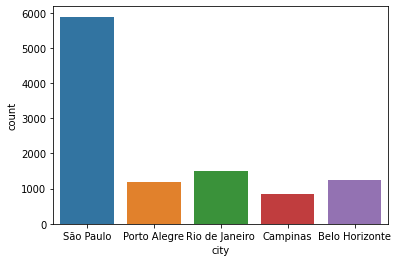

In [39]:
sns.countplot(x = 'city', data = df)

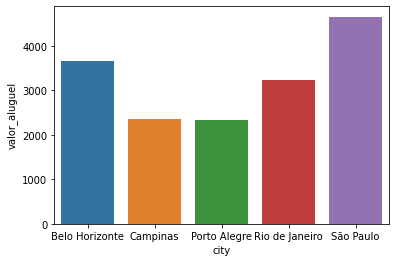

In [40]:
sns.barplot(x = 'city', y = 'valor_aluguel', data = df.groupby('city')['valor_aluguel'].mean().reset_index())

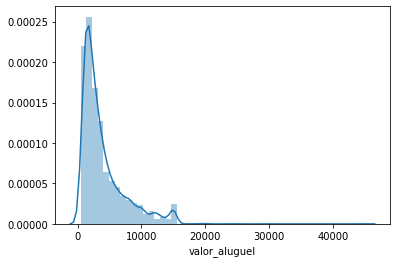

In [41]:
sns.distplot(df['valor_aluguel'])

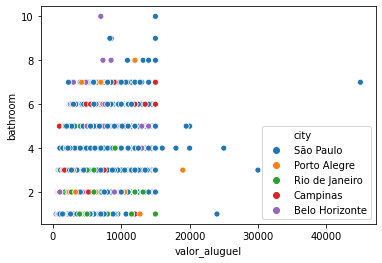

In [47]:
sns.scatterplot(x = 'valor_aluguel', y = 'bathroom', hue = 'city', data = df)

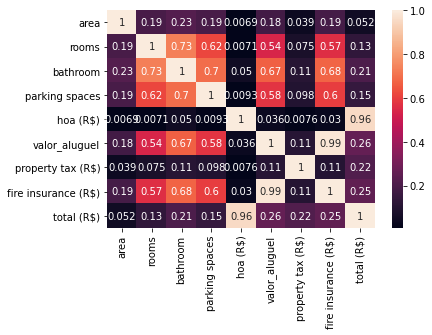

In [49]:
sns.heatmap(df.corr(), annot=True)

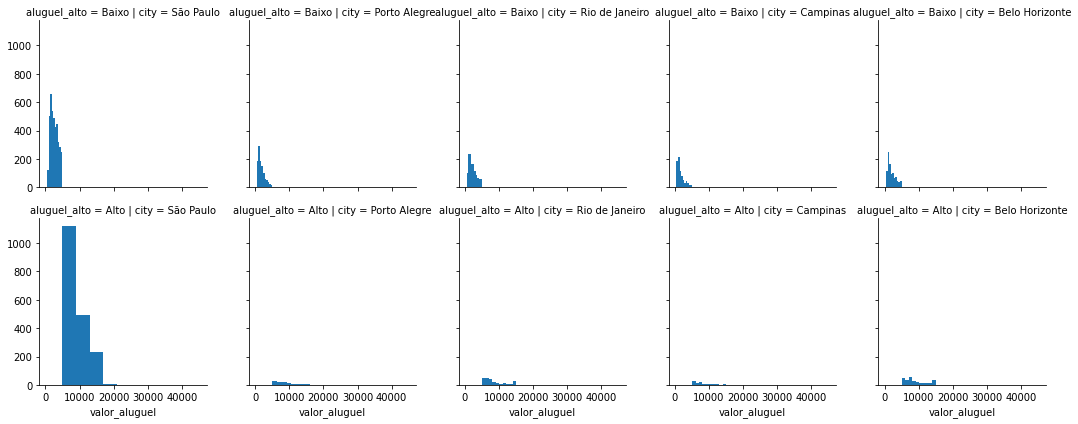

In [57]:
sns.FacetGrid(df, col="city", row='aluguel_alto').map(plt.hist, 'valor_aluguel')